In [1]:
import cv2
import os
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
input_dir = 'test_sample/'
model_dir = 'model/'
model_str_file = 'model_structure.json'
model_weights_file = 'model_weights.h5'

In [3]:
print(os.listdir(input_dir))

['6990.jpg']


In [4]:
class_names = os.listdir('input/train')
print(class_names)

['neg', 'pos']


In [5]:
def load_trained_model(model_str_path, model_wt_path):
    f = Path(model_str_path)
    model_structure = f.read_text()
    trained_model = model_from_json(model_structure)
    trained_model.load_weights(model_wt_path)
    return trained_model

In [6]:
str_path = os.path.join(model_dir,model_str_file)
wt_path = os.path.join(model_dir,model_weights_file)

In [7]:
model = load_trained_model(str_path, wt_path)

In [8]:
def predict_result(image_path, model):
    img = image.load_img(image_path, target_size=(64, 64))
    plt.imshow(img)
    image_to_test = image.img_to_array(img)
    list_of_images = np.expand_dims(image_to_test, axis=0)
    result = model.predict(list_of_images)[0]
    plt.imshow(img)
    plt.title(result)
    plt.show()
    most_likely_class_index = int(np.argmax(result))
    class_likelihood = result[most_likely_class_index]
    class_label = class_names[most_likely_class_index]
    print("Predicted class is  {}".format(class_label))

C:\Users\cvsra\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


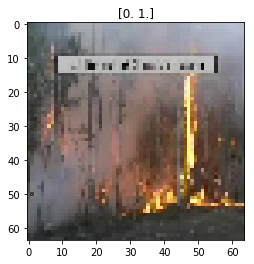

Predicted class is  pos


In [19]:
predict_result('test_sample/7680.jpg',model)